In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1.Data Understanding Step
#### - Obtain the churn dataset and understand its structure, variables, and meaning of each column.
#### - Identify the target variable, which indicates whether a customer has churned or not.
#### - Explore the other features (independent variables) available in the dataset that can potentially be used for prediction.

#### 1) Get our data set

In [3]:
df = pd.read_csv('churn.txt', encoding = 'latin1')

In [4]:
df.head()

,Øòàò,Äëèíà ñ÷åòà,Êîä çîíû,Íîìåð òåëåôîíà,Óñëóãà ìåæäóíàðîäíûõ çâîíêîâ,Óñëóãà VMail,Êîëè÷åñòâî VMail,Äíåâíûå ìèíóòû,Äíåâíûå çâîíêè,Äíåâíàÿ îïëàòà,...,Âå÷åðíèå çâîíêè,Âå÷åðíÿÿ îïëàòà,Íî÷íûå ìèíóòû,Íî÷íûå çâîíêè,Íî÷íàÿ îïëàòà,Ìåæäóíàðîäíûå ìèíóòû,Ìåæäóíàðîäíûå çâîíêè,Ìåæäóíàðîäíàÿ îïëàòà,Îáðàùåíèé â ÑÖ,Óõîä
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Changing columns of our data set. 

In [5]:
df.columns = ['State','Account length','Area code','Phone Number','International Plan','Voice mail plan','Number vmail messages',
             'Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes',
             'Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge', 'Customer service calls','Churn']

In [6]:
df.head()

,State,Account length,Area code,Phone Number,International Plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Columns are Readable now!

#### 2) Target Variable is Churn column

In [7]:
df['Churn'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3333 entries, 0 to 3332
Series name: Churn
Non-Null Count  Dtype
--------------  -----
3333 non-null   bool 
dtypes: bool(1)
memory usage: 3.4 KB


#### 3) Relevance Step -  check which columns are relevant to consider and which are not. 

#### Let us see which columns are correlated and decide which ones to drop.

In [8]:
df.corr()['Churn']

C:\Users\muham\AppData\Local\Temp\ipykernel_25204\2162727513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Churn']


Account length            0.016541
Area code                 0.006174
International Plan        0.259852
Voice mail plan          -0.102148
Number vmail messages    -0.089728
Total day minutes         0.205151
Total day calls           0.018459
Total day charge          0.205151
Total eve minutes         0.092796
Total eve calls           0.009233
Total eve charge          0.092786
Total night minutes       0.035493
Total night calls         0.006141
Total night charge        0.035496
Total intl minutes        0.068239
Total intl calls         -0.052844
Total intl charge         0.068259
Customer service calls    0.208750
Churn                     1.000000
Name: Churn, dtype: float64

##### Based on the correlation, we can drop following columns: State, Area code, Total eve calls, Total night calls, and Phone Number.

In [9]:
df.drop(['State','Area code','Total eve calls','Total night calls'], axis=1, inplace=True)

In [10]:
df.drop('Phone Number', axis = 1, inplace = True)

In [11]:
df.head()

,Account length,International Plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,False,True,25,265.1,110,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1,False
1,107,False,True,26,161.6,123,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1,False
2,137,False,False,0,243.4,114,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0,False
3,84,True,False,0,299.4,71,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2,False
4,75,True,False,0,166.7,113,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3,False


# 2.Data Preprocessing
#### - Handle missing Values
#### - Handle Categorical Values
#### - Handle Feature Scaling

#### 1)Handle Missing Values

In [12]:
df.isnull().sum()

Account length            0
International Plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve charge          0
Total night minutes       0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

##### Our data set does not have any missing Values.

In [13]:
#Checking our Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   International Plan      3333 non-null   bool   
 2   Voice mail plan         3333 non-null   bool   
 3   Number vmail messages   3333 non-null   int64  
 4   Total day minutes       3333 non-null   float64
 5   Total day calls         3333 non-null   int64  
 6   Total day charge        3333 non-null   float64
 7   Total eve minutes       3333 non-null   float64
 8   Total eve charge        3333 non-null   float64
 9   Total night minutes     3333 non-null   float64
 10  Total night charge      3333 non-null   float64
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   int64  
 13  Total intl charge       3333 non-null   float64
 14  Customer service calls  3333 non-null   

### 2)Handle Categorical Values

#### Encoding Boolean Values of [International Plan, Voice mail plan, Churn] using LabelEncoder()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
columns_to_encode = ['International Plan','Voice mail plan','Churn']
label_encoder = LabelEncoder()  
# Create an instance of LabelEncoder for encoding categorical variables

In [16]:
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [17]:
df.head()

,Account length,International Plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3,0


In [18]:
df[columns_to_encode].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   International Plan  3333 non-null   int64
 1   Voice mail plan     3333 non-null   int64
 2   Churn               3333 non-null   int64
dtypes: int64(3)
memory usage: 78.2 KB


#### Values of [International Plan, Voice mail plan, Churn] changed from True/False to 1/0!

### 3)Handle Feature Scaling using Standard Scaler

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
columns_to_scale = df.drop(['International Plan', 'Voice mail plan', 'Churn'], axis=1).columns
# scaling values of all columns except for these 3.

In [21]:
scaler = StandardScaler()

In [22]:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale].values)

In [23]:
df.head()

,Account length,International Plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0.676489,0,1,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.070427,0.866743,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0
1,0.149065,0,1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,-0.107549,1.058571,1.059390,1.240482,-0.601195,1.241169,-0.427932,0
2,0.902529,0,0,-0.591760,1.168304,0.675985,1.168464,-1.573383,-1.573900,-0.756869,-0.755571,0.703121,0.211534,0.697156,-1.188218,0
3,-0.428590,1,0,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-2.743268,-0.078551,-0.078806,-1.303026,1.024263,-1.306401,0.332354,0
4,-0.654629,1,0,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,-1.037939,-0.276311,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,0


# 3.Exploratory Data Analysis (EDA) 
#### this part is mainly about ploting various graphs.

<Axes: >

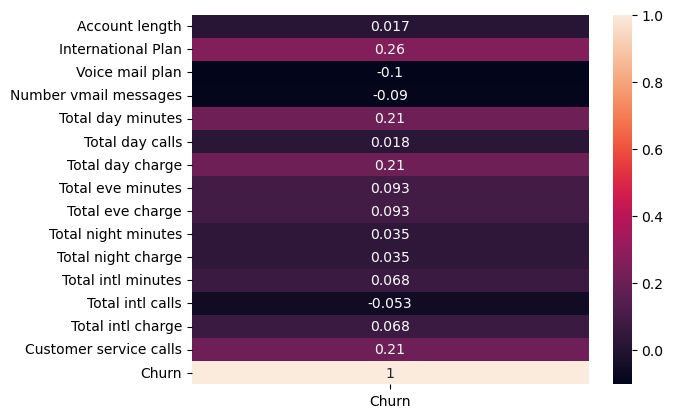

In [24]:
sns.heatmap(df.corr()['Churn'].to_frame(), annot=True)

#### The heat map shows the relationship between Churn and every other columns.

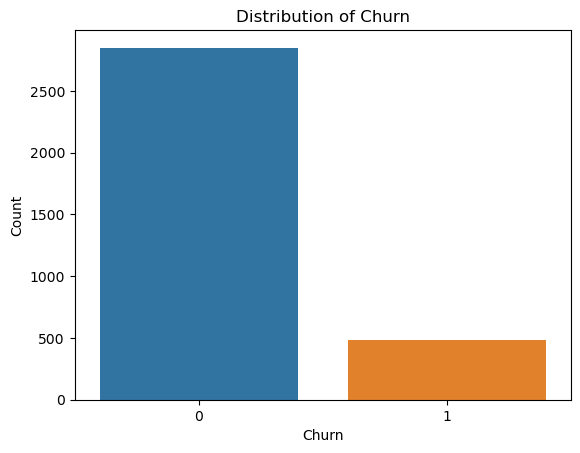

In [25]:
import seaborn as sns

sns.countplot(data=df, x='Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')
plt.show()


# 4.Model Building
#### - Logistic Regression
#### - Decision Trees
#### - K Nearest Neighbors
#### - Neural Networks

Since we are going to indentify whether a customer churned (unsubscribed) or not churned, we weed algorithms like Logistic Regression that classify.

### 1)Logistic Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
x = df.drop('Churn', axis=1)
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [28]:
logistic_model = LogisticRegression(max_iter=200)

In [29]:
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [30]:
logistic_pred = logistic_model.predict(x_test)

In [31]:
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       869
           1       0.43      0.17      0.24       131

    accuracy                           0.86      1000
   macro avg       0.66      0.57      0.58      1000
weighted avg       0.83      0.86      0.83      1000



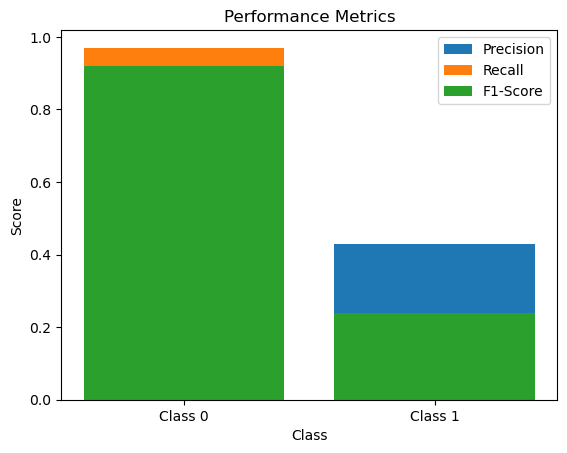

In [32]:
import matplotlib.pyplot as plt

precision = [0.89, 0.43]
recall = [0.97, 0.17]
f1_score = [0.92, 0.24]
labels = ['Class 0', 'Class 1']

plt.bar(labels, precision, label='Precision')
plt.bar(labels, recall, label='Recall')
plt.bar(labels, f1_score, label='F1-Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.legend()
plt.show()


### 2) Decision Trees

In [33]:
from sklearn.tree import DecisionTreeClassifier

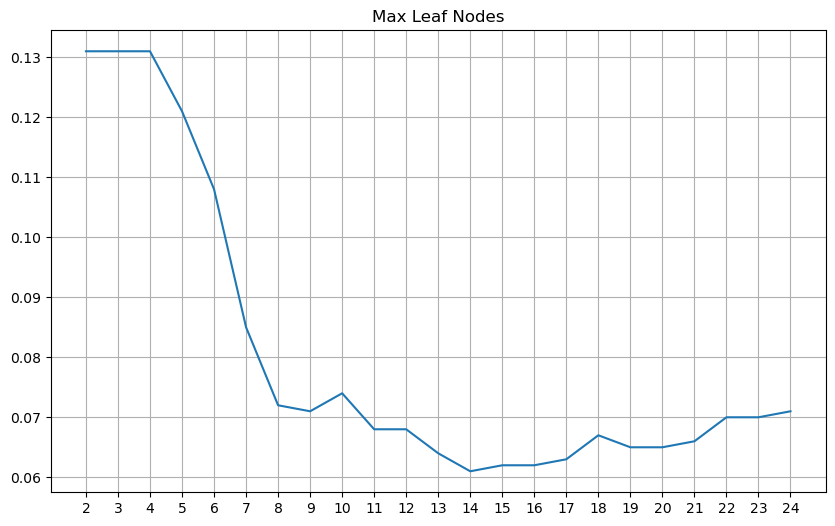

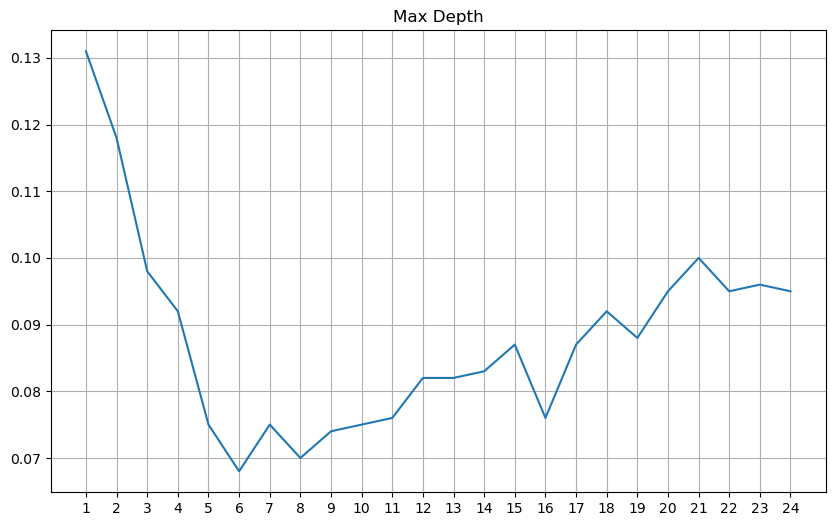

In [34]:
#finding the best k value for max_leaf_nodes and max_depth in Tree algorithm
from sklearn import metrics,tree
f1 = []
for k in range(2,25):
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.mean_squared_error(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(2,25),f1)
plt.xticks(range(2,25))
plt.title('Max Leaf Nodes')
plt.grid()
plt.show()

f1 = []
for k in range(1,25):
    dt = tree.DecisionTreeClassifier(max_depth=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.mean_squared_error(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.title('Max Depth')
plt.grid()
plt.show()

### From the graph, best Max Leaf Nodes can be 14, 15, or 16. Best Max Depth can be 7 or 8

In [35]:
dtree = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=15)

In [36]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=15)

In [37]:
dtree_pred = dtree.predict(x_test)

In [38]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       869
           1       0.83      0.66      0.74       131

    accuracy                           0.94      1000
   macro avg       0.89      0.82      0.85      1000
weighted avg       0.93      0.94      0.94      1000



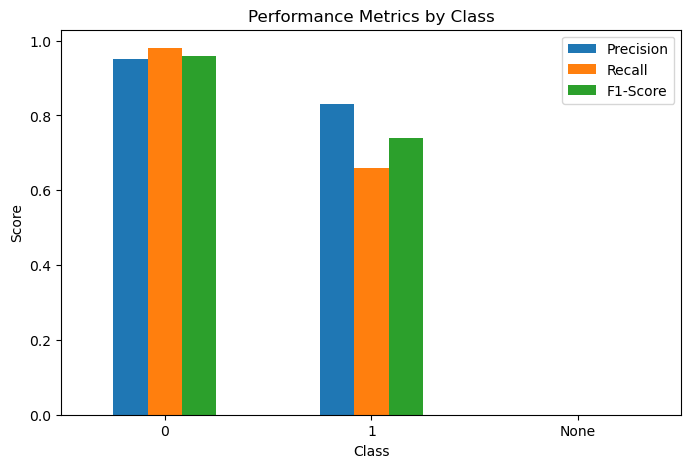

       Precision  Recall  F1-Score  Support
Class                                      
0           0.95    0.98      0.96    869.0
1           0.83    0.66      0.74    131.0
None         NaN     NaN       NaN      NaN


In [39]:
import matplotlib.pyplot as plt
import pandas as pd

classification_report = """
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       869
           1       0.83      0.66      0.74       131

    accuracy                           0.94      1000
   macro avg       0.89      0.82      0.85      1000
weighted avg       0.93      0.94      0.94      1000
"""

report_lines = classification_report.strip().split('\n')
data = [line.split() for line in report_lines[2:-3]]  
df = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
df = df.set_index('Class')


df[['Precision', 'Recall', 'F1-Score', 'Support']] = df[['Precision', 'Recall', 'F1-Score', 'Support']].astype(float)


fig, ax = plt.subplots(figsize=(8, 5))
df[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=ax)
ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Class')
ax.legend()
plt.xticks(rotation=0)
plt.show()


print(df)


### 3) K Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier

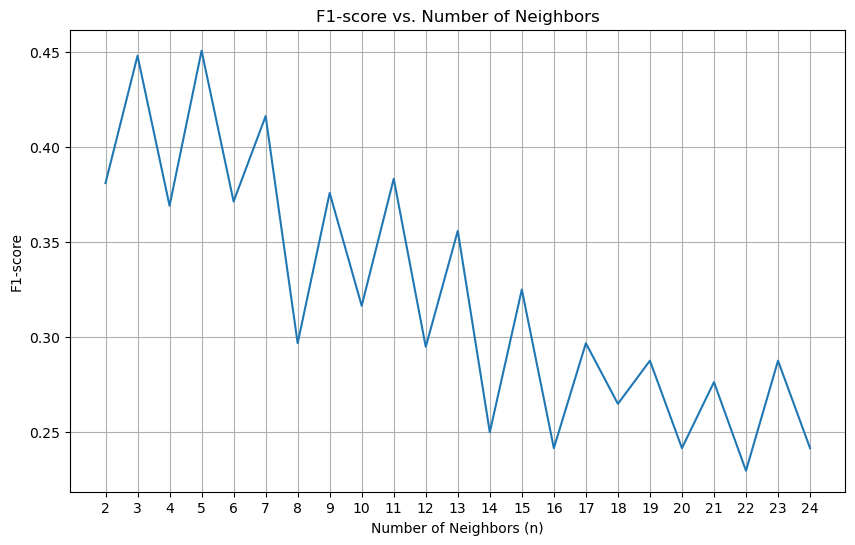

In [41]:

f1_scores = []
for n in range(2, 25):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)  
    y_pred = knn.predict(x_test)
    f1_scores.append(metrics.f1_score(y_test, y_pred))  # Calculate F1-score

plt.figure(figsize=(10, 6))
plt.plot(range(2, 25), f1_scores)
plt.xticks(range(2, 25))
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('F1-score')
plt.title('F1-score vs. Number of Neighbors')
plt.grid()
plt.show()


### Number of neighbors with 15, 20, or 22 looks good 

In [42]:
knn = KNeighborsClassifier(n_neighbors=20)

In [43]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [44]:
pred_knn = knn.predict(x_test)

In [45]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred_knn)
print(report)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94       869
           1       1.00      0.14      0.24       131

    accuracy                           0.89      1000
   macro avg       0.94      0.57      0.59      1000
weighted avg       0.90      0.89      0.85      1000



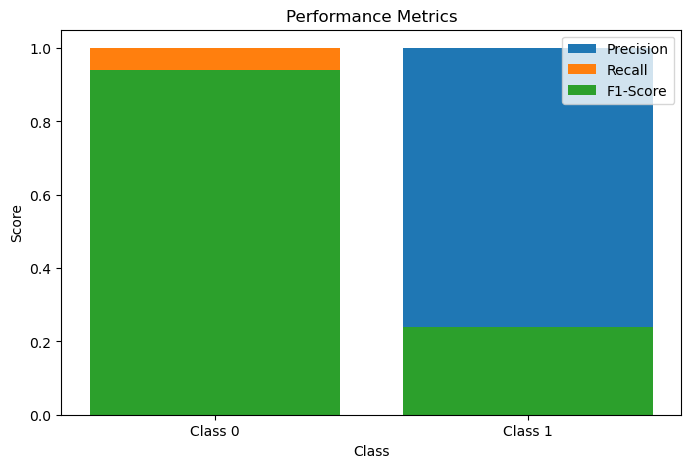

In [46]:
# Precision, Recall, and F1-score values for each class
precision = [0.88, 1.00]
recall = [1.00, 0.14]
f1_score = [0.94, 0.24]
labels = ['Class 0', 'Class 1']

# Plotting the metrics
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(labels, precision, label='Precision')
ax.bar(labels, recall, label='Recall')
ax.bar(labels, f1_score, label='F1-Score')
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics')
ax.legend()
plt.show()


# Neural Network

In [47]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report

model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32)

y_pred_proba = model.predict(x_test)
y_pred = (y_pred_proba > 0.5).astype(int)




Epoch 1/10
73/73 [==============================] - 1s 2ms/step - loss: 0.4462 - accuracy: 0.8127
Epoch 2/10
73/73 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8714
Epoch 3/10
73/73 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.8984
Epoch 4/10
73/73 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.9057
Epoch 5/10
73/73 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.9108
Epoch 6/10
73/73 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9181
Epoch 7/10
73/73 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9164
Epoch 8/10
73/73 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9228
Epoch 9/10
73/73 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9271
Epoch 10/10
32/32 [==============================] - 0s 1ms/step


In [48]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       869
           1       0.85      0.53      0.66       131

    accuracy                           0.93      1000
   macro avg       0.89      0.76      0.81      1000
weighted avg       0.92      0.93      0.92      1000



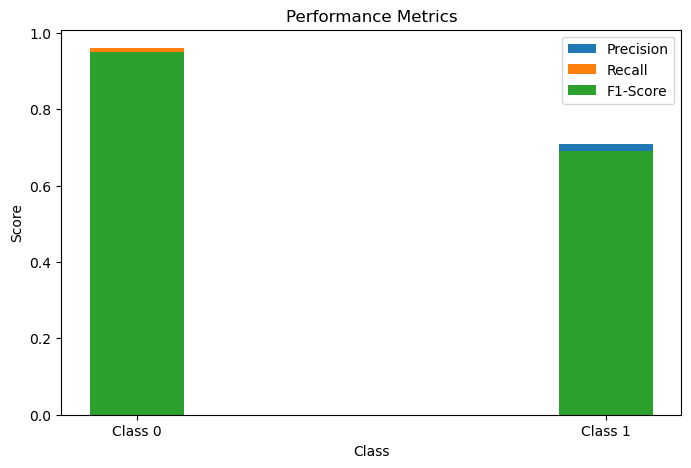

In [49]:
import matplotlib.pyplot as plt

precision = [0.95, 0.71]
recall = [0.96, 0.66]
f1_score = [0.95, 0.69]
labels = ['Class 0', 'Class 1']

x = range(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x, precision, width=0.2, label='Precision')
plt.bar(x, recall, width=0.2, label='Recall')
plt.bar(x, f1_score, width=0.2, label='F1-Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.xticks(x, labels)
plt.legend()
plt.show()


# Conclusion

In [50]:
import pandas as pd

# Define the results for each algorithm
results = {
    'Algorithm': ['Logistic Regression', 'Decision Trees', 'K-Nearest Neighbors', 'Neural Network'],
    'Precision_0': [0.89, 0.95, 0.88, 0.95],
    'Precision_1': [0.43, 0.83, 1.00, 0.76],
    'Recall_0': [0.97, 0.98, 1.00, 0.97],
    'Recall_1': [0.17, 0.66, 0.14, 0.66],
    'F1-Score_0': [0.92, 0.96, 0.94, 0.96],
    'F1-Score_1': [0.24, 0.74, 0.24, 0.71],
    'Support_0': [869, 869, 869, 869],
    'Support_1': [131, 131, 131, 131],
    'Accuracy': [0.86, 0.94, 0.89, 0.93]
}

# Create the data frame
df_results = pd.DataFrame(results)

# Set the 'Algorithm' column as the index
df_results.set_index('Algorithm', inplace=True)

# Print the data frame
print(df_results)


                     Precision_0  Precision_1  Recall_0  Recall_1  F1-Score_0  \
Algorithm                                                                       
Logistic Regression         0.89         0.43      0.97      0.17        0.92   
Decision Trees              0.95         0.83      0.98      0.66        0.96   
K-Nearest Neighbors         0.88         1.00      1.00      0.14        0.94   
Neural Network              0.95         0.76      0.97      0.66        0.96   

                     F1-Score_1  Support_0  Support_1  Accuracy  
Algorithm                                                        
Logistic Regression        0.24        869        131      0.86  
Decision Trees             0.74        869        131      0.94  
K-Nearest Neighbors        0.24        869        131      0.89  
Neural Network             0.71        869        131      0.93  


## As you can see, our Neural Network Model is doing pretty well, so I am going to save this model for deployment.

In [51]:
from keras.models import Sequential
from keras.layers import Dense
import os

# Assume you have already trained your neural network model and have it stored in the 'model' variable

# Specify the file path for saving the model to the desktop
desktop_path = os.path.expanduser("~/Desktop")
model_path = os.path.join(desktop_path, "neural_network_model.h5")

# Save the model to the desktop
model.save(model_path)


## Note that some values may have experienced a slight change because of running a current notebook.